number of graph2
comma seperated edgea-b,b-d,b-c
comma seperated edgea-b,b-d,b-a


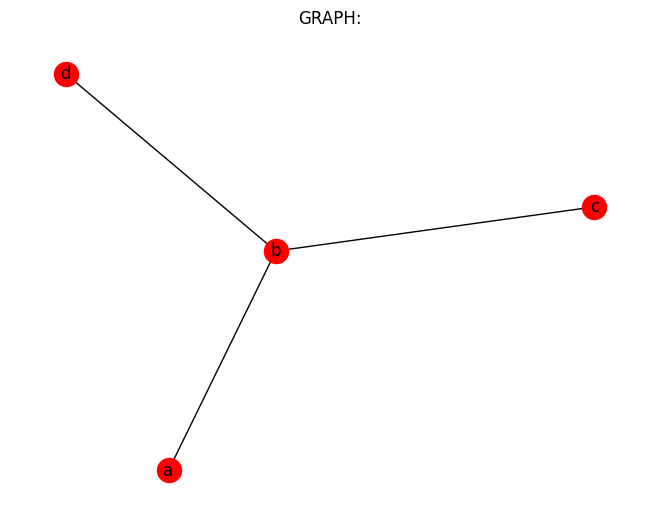

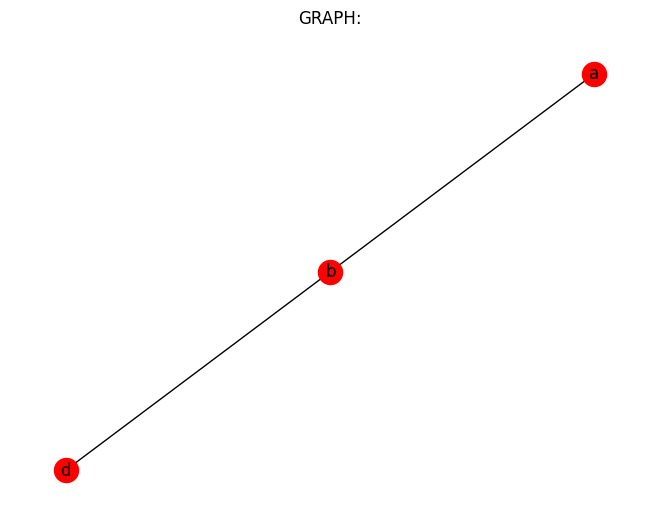

min_sup1
 {'b-c'} -> support->1
 {'a-b'} -> support->2
 {'b-d'} -> support->2
 {'b-a'} -> support->1
 {'b-c', 'a-b'} -> support->1
 {'b-c', 'b-d'} -> support->1
 {'a-b', 'b-d'} -> support->2
 {'a-b', 'b-a'} -> support->1
 {'b-d', 'b-a'} -> support->1
 {'b-c', 'a-b', 'b-d'} -> support->1
 {'a-b', 'b-a', 'b-d'} -> support->1


In [ ]:
from itertools import combinations
import matplotlib.pyplot as plt
import networkx as nx

def findsubgraph(graphs,min_sup):
  alledge=set()
  for g in graphs:
    alledge |=g
  subgraphs=[]
  for i in range(1,len(alledge)+1):
    for comb in combinations(alledge,i):
      count=sum(set(comb).issubset(g) for g in graphs)
      if count>=min_sup:
        subgraphs.append((set(comb),count))
  return subgraphs




def drawgraph(edge):
  g=nx.Graph()
  for e in edge:
    u,v=e.split('-')
    g.add_edge(u.strip(),v.strip())
  pos=nx.spring_layout(g,seed=42)
  nx.draw(g,pos,with_labels=True,node_color='red')
  plt.title('GRAPH:')
  plt.show()

graphs=[]
n=int(input('number of graph'))
for i in range(n):
  edges=input('comma seperated edge')
  edge=set(edges.strip().split(','))
  graphs.append(edge)
for g in graphs:
  drawgraph(g)
m=int(input('min_sup'))
frequent=findsubgraph(graphs,m)

for a , b in frequent:
  print(f" {a} -> support->{b}")

number of graph2
comma seperated edgea-b,b-d,b-c
comma seperated edgea-b,b-d,b-a

In [ ]:
import networkx as nx


edges = input("Enter edges (comma separated, e.g. A-B,B-C,C-D): ").split(',')
G = nx.Graph()
for e in edges:
    u, v = e.split('-')
    G.add_edge(u.strip(), v.strip())

print("\nOriginal Graph:")
print(G.edges())

def girvan_newman(G):
    G = G.copy()
    components = [list(G.nodes())]
    while G.number_of_edges() > 0:

        bw = nx.edge_betweenness_centrality(G)

        max_bw = max(bw.values())
        edges_to_remove = [edge for edge, val in bw.items() if val == max_bw]

        G.remove_edges_from(edges_to_remove)

        comps = [list(c) for c in nx.connected_components(G)]
        components.append(comps)
        if len(comps) > 1:
            break
    return comps

communities = girvan_newman(G)
print("\nDetected Communities:")
for i, c in enumerate(communities):
    print(f"Community {i+1}: {c}")


Enter edges (comma separated, e.g. A-B,B-C,C-D): a-b,b-c,b-d,a-e

Original Graph:
[('a', 'b'), ('a', 'e'), ('b', 'c'), ('b', 'd')]

Detected Communities:
Community 1: ['a', 'e']
Community 2: ['c', 'b', 'd']


Enter edges (comma separated, e.g. A-B,B-C,C-D): A-B,B-C,C-D

Original Graph Edges:
[('A', 'B'), ('B', 'C'), ('C', 'D')]

Detected Communities:
Community 1: ['A', 'B']
Community 2: ['C', 'D']


/tmp/ipython-input-1625029767.py:65: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


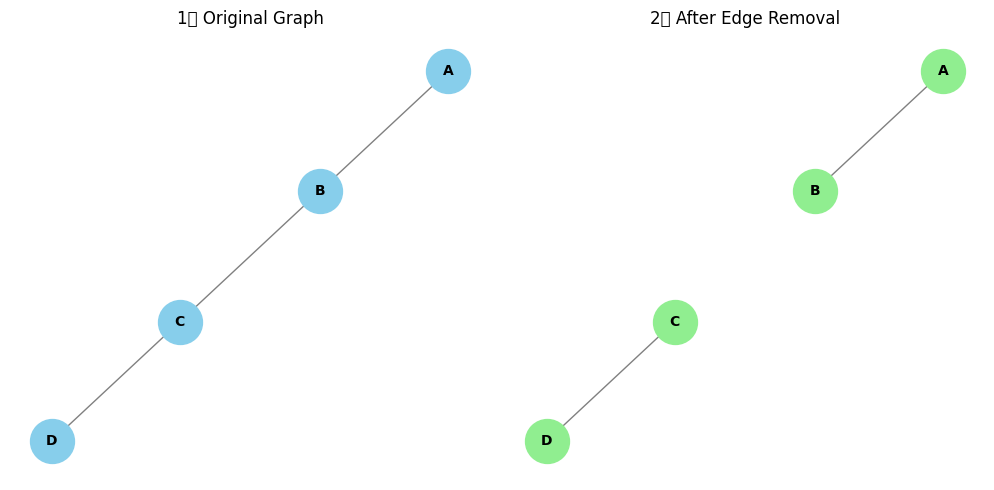

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Take user input
# -------------------------------
edges = input("Enter edges (comma separated, e.g. A-B,B-C,C-D): ").split(',')
G = nx.Graph()

for e in edges:
    u, v = e.split('-')
    G.add_edge(u.strip(), v.strip())

print("\nOriginal Graph Edges:")
print(G.edges())

# -------------------------------
# Step 2: Define Girvan–Newman algorithm (simplified)
# -------------------------------
def girvan_newman_simple(G):
    G = G.copy()
    steps = [list(G.edges())]  # store graph states
    while G.number_of_edges() > 0:
        bw = nx.edge_betweenness_centrality(G)
        max_bw = max(bw.values())
        edges_to_remove = [edge for edge, val in bw.items() if val == max_bw]
        G.remove_edges_from(edges_to_remove)
        steps.append(list(G.edges()))
        comps = [list(c) for c in nx.connected_components(G)]
        if len(comps) > 1:
            return comps, steps  # stop once split occurs
    return [list(G.nodes())], steps

# -------------------------------
# Step 3: Detect communities
# -------------------------------
communities, steps = girvan_newman_simple(G)

print("\nDetected Communities:")
for i, c in enumerate(communities, 1):
    print(f"Community {i}: {c}")

# -------------------------------
# Step 4: Draw 3 graphs
# -------------------------------
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(15, 5))

# --- (1) Original Graph ---
plt.subplot(1, 3, 1)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray',
        node_size=1000, font_size=10, font_weight='bold')
plt.title("1️⃣ Original Graph")

# --- (2) After First Edge Removal ---
plt.subplot(1, 3, 2)
tempG = nx.Graph()
tempG.add_edges_from(steps[1]) if len(steps) > 1 else tempG.add_edges_from(steps[0])
nx.draw(tempG, pos, with_labels=True, node_color='lightgreen', edge_color='gray',
        node_size=1000, font_size=10, font_weight='bold')
plt.title("2️⃣ After Edge Removal")



plt.tight_layout()
plt.show()
